> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [No-Show Appointment]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> ****: In this section of the report, provide a brief introduction to the dataset i have selected for analysis. Read through the description available on the homepage-links present [here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True). List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables. 

> This dataset are information collected from 100 thousands medical appointment in Brazil , this focused on the question of wether a patient show up or not for their appointment.

>This Dataset contains 13 columns and 110527 rows

>The columns and their information

>Patientid -> patient identification number

>AppointmentID -> Appointment identification

>Gender->Male or female

>AppointmentDay ->The appointment day

>ScheduleDay -> The day patients get their appointment date

>Age -> Pateint Age 

>Neighbourhood -> Hospital location

>Scholarship -> indicate if patients are on scholarship or not

>Hypertension -> True or False (whether a patient is hypertensive or not)

>Diabetes -> True or False (whether a patient is diabetics or not)

>Alcoholism ->True or False 

>Handicap -> True or False 

>Sms_received -> This indicate if a patient received messaged or not 

>No-Show -> This indicate whether a patient show or not 



### Question(s) for Analysis
> 1. The percentage  of people that show for the appointment to those that didn't show

> 2. Who showed up most for the appointment between male and female

> 3. How does waiting days affect show up

> 4. How does the Sms affect the show up

> 5. Does the Scholarship affect the patients appointment

> 6. How does the diseases  affect the show up rate

In [261]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [262]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [263]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df= pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [265]:
#check the number rows and columns
df.shape

(110527, 14)

In [266]:
#check statics properties

df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [267]:
#lets check the number of missing values

df.isnull().sum().any()


False

 <h4>There is no missing values in the datasets given</h4>

In [268]:
#lets check if there's any duplicate values
sum(df.duplicated())

0

<p>Looks cool the Datasets has zero duplicate and zero missing values </p>

<h1>Remarks from the above operations</h1>
<p> patients age range between  -1 and 115 while the average age is 37</p>
<p>9.826% patints have scholarship</p>
<p>19.72% percentage patients have high blood pressure </p>
<p>7.18% of the patients have diabetes</p>
<p> 3% of these patients are alcoholic </p>
<p>2.2% of them are handicaped</p>
<p>32% of them received sms</p>


### Data Cleaning
>1. drop columns which are irrelivant to this analysis
>2. change column names to the appropriate one
>3. chnage column name to lowwer
>3. change time datatype to datetime 
>4. fill age with negative value with mean age value
>5. Drop column with appointment day greater than schedule date 


In [269]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
#here let's drop the useless columns

df.drop(['PatientId','AppointmentID'],axis=1, inplace=True)


> Now we have dropped the PatientId and AppointmentID because they are not useful

In [270]:
#confirm if changes has occur
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [271]:
#changing the columns to lowercase 
df.columns = df.columns.str.lower()

>The columns are converted to lower case

In [272]:
#confirm the changes
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


>Now we will be correcting the columns with wrong spelling and hypen 

In [273]:
#rename columns with wrong spellings and replace - with _

df.rename(columns={'handcap':'handicap','hipertension':'hypertension','no-show':'no_show'}, inplace=True)

In [274]:
#confirm change
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


>In the below cell we will changing the datatype of the following columns to datetime

> 1. scheduleday

> 2. appoitmentday

In [275]:
#change appointmentday and scheduledday to datetime format
df['scheduledday'] = pd.to_datetime(df['scheduledday'])
df['appointmentday'] = pd.to_datetime(df['appointmentday'])

**Changed the scheduledday and appointmentday datatype to datetime for easy exploration**

In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   gender          110527 non-null  object             
 1   scheduledday    110527 non-null  datetime64[ns, UTC]
 2   appointmentday  110527 non-null  datetime64[ns, UTC]
 3   age             110527 non-null  int64              
 4   neighbourhood   110527 non-null  object             
 5   scholarship     110527 non-null  int64              
 6   hypertension    110527 non-null  int64              
 7   diabetes        110527 non-null  int64              
 8   alcoholism      110527 non-null  int64              
 9   handicap        110527 non-null  int64              
 10  sms_received    110527 non-null  int64              
 11  no_show         110527 non-null  object             
dtypes: datetime64[ns, UTC](2), int64(7), object(3)
memory usage: 10.1+ MB


In [277]:
#confirm changes
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [278]:
#check the tail
df.tail()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
110522,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,F,2016-04-27 13:30:56+00:00,2016-06-07 00:00:00+00:00,54,MARIA ORTIZ,0,0,0,0,0,1,No


>**for easy exploration let change the no-show column to 0 and 1**

>**zero for patient that did'nt show up** 

>**one for patient that did show up** 



In [279]:
#for easy exploration let change the no-show column to 0 and 1 
# zero for patient that did'nt show up 
# one for patient that did show up 
df['no_show']= df['no_show'].apply(lambda x: 0 if x=='Yes' else 1)

In [280]:
#confirm change
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,1


array([[<AxesSubplot:title={'center':'scheduledday'}>,
        <AxesSubplot:title={'center':'appointmentday'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'scholarship'}>,
        <AxesSubplot:title={'center':'hypertension'}>,
        <AxesSubplot:title={'center':'diabetes'}>],
       [<AxesSubplot:title={'center':'alcoholism'}>,
        <AxesSubplot:title={'center':'handicap'}>,
        <AxesSubplot:title={'center':'sms_received'}>],
       [<AxesSubplot:title={'center':'no_show'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

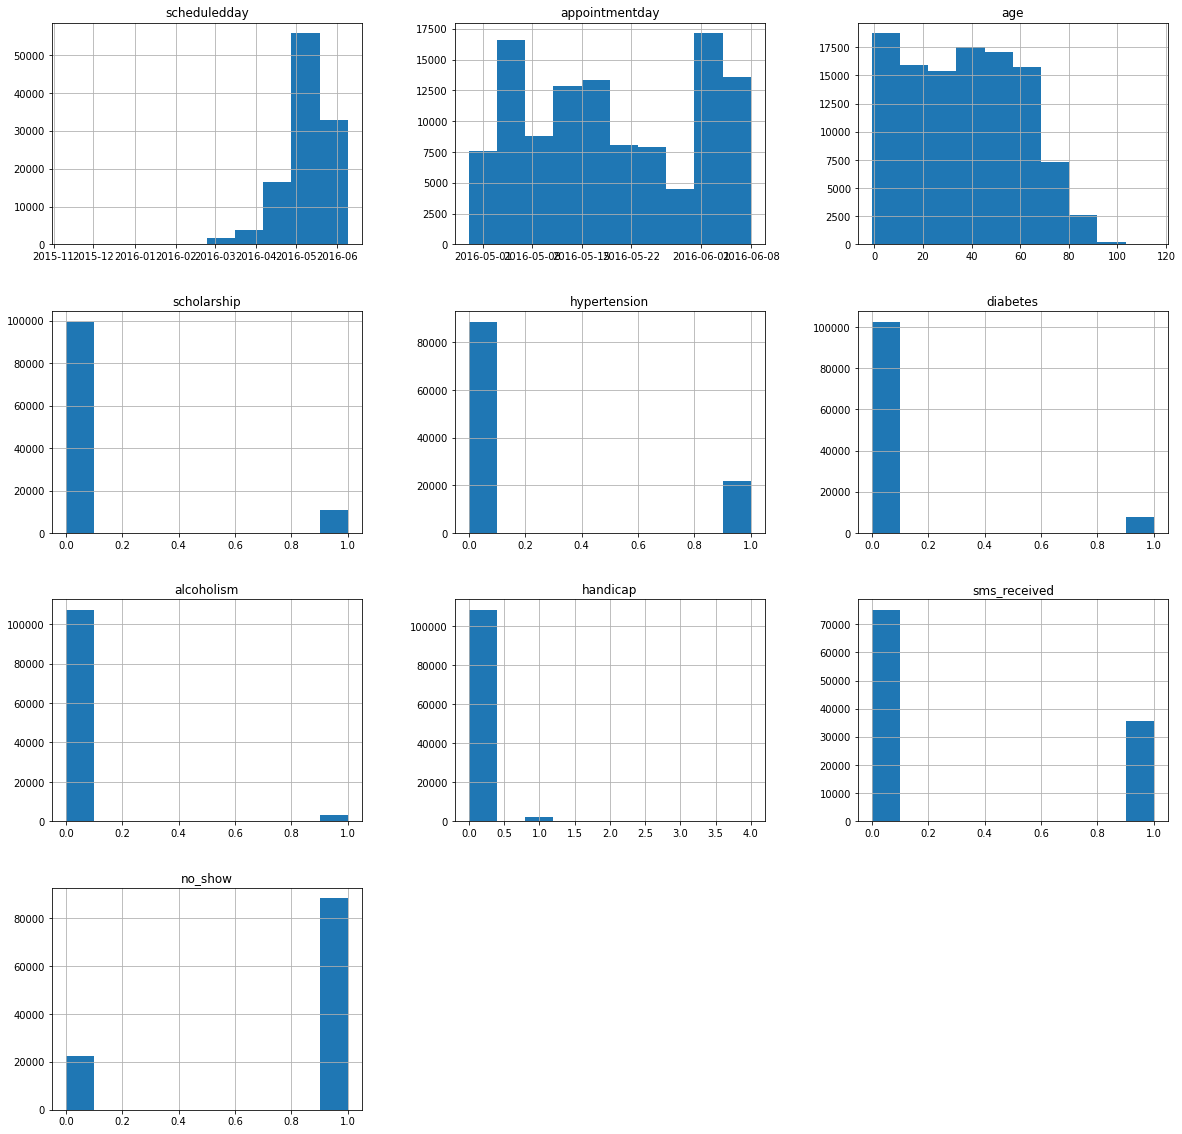

In [281]:
df.hist(figsize=(20,20))

> In the next cell we will filling the negative age with age mean

In [282]:

mean = df['age'].mean()
df['age'] = df['age'].apply(lambda x: mean if x==-1 else x )


In [283]:
#confirm change
df.describe()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.089219,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.798067
std,23.109921,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


In [284]:
#no_show statistics
df.no_show.describe()

count    110527.000000
mean          0.798067
std           0.401444
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: no_show, dtype: float64

In [285]:
# lets confirm row with -1
df.query('age == -1').describe()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   gender          110527 non-null  object             
 1   scheduledday    110527 non-null  datetime64[ns, UTC]
 2   appointmentday  110527 non-null  datetime64[ns, UTC]
 3   age             110527 non-null  float64            
 4   neighbourhood   110527 non-null  object             
 5   scholarship     110527 non-null  int64              
 6   hypertension    110527 non-null  int64              
 7   diabetes        110527 non-null  int64              
 8   alcoholism      110527 non-null  int64              
 9   handicap        110527 non-null  int64              
 10  sms_received    110527 non-null  int64              
 11  no_show         110527 non-null  int64              
dtypes: datetime64[ns, UTC](2), float64(1), int64(7), object(2)
memory usage:

In [287]:
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62.0,JARDIM DA PENHA,0,1,0,0,0,0,1
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0,0,0,0,0,0,1
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62.0,MATA DA PRAIA,0,0,0,0,0,0,1
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0,1,1,0,0,0,1


>From the table you will notice that the Scheduleday is ahead the appointmentday

>So we need to drop the columns with this error 

In [288]:
#checking if the scheduleday date that are ahead the appointmentday
mask = df.query('appointmentday <scheduledday ')
mask.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62.0,JARDIM DA PENHA,0,1,0,0,0,0,1
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0,0,0,0,0,0,1
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62.0,MATA DA PRAIA,0,0,0,0,0,0,1
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0,1,1,0,0,0,1


**looking at the above table we noticed that there are schedule dates that are ahead the appointment date**

**we need to get rid of those columns containing such**

> we will do the cleaning in the next cell

In [289]:

#getting rid of scheduleday ahead appointmentday
df = df.query('appointmentday >scheduledday ')
mask.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62.0,JARDIM DA PENHA,0,1,0,0,0,0,1
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0,0,0,0,0,0,1
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62.0,MATA DA PRAIA,0,0,0,0,0,0,1
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0,1,1,0,0,0,1


array([[<AxesSubplot:title={'center':'scheduledday'}>,
        <AxesSubplot:title={'center':'appointmentday'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'scholarship'}>,
        <AxesSubplot:title={'center':'hypertension'}>,
        <AxesSubplot:title={'center':'diabetes'}>],
       [<AxesSubplot:title={'center':'alcoholism'}>,
        <AxesSubplot:title={'center':'handicap'}>,
        <AxesSubplot:title={'center':'sms_received'}>],
       [<AxesSubplot:title={'center':'no_show'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

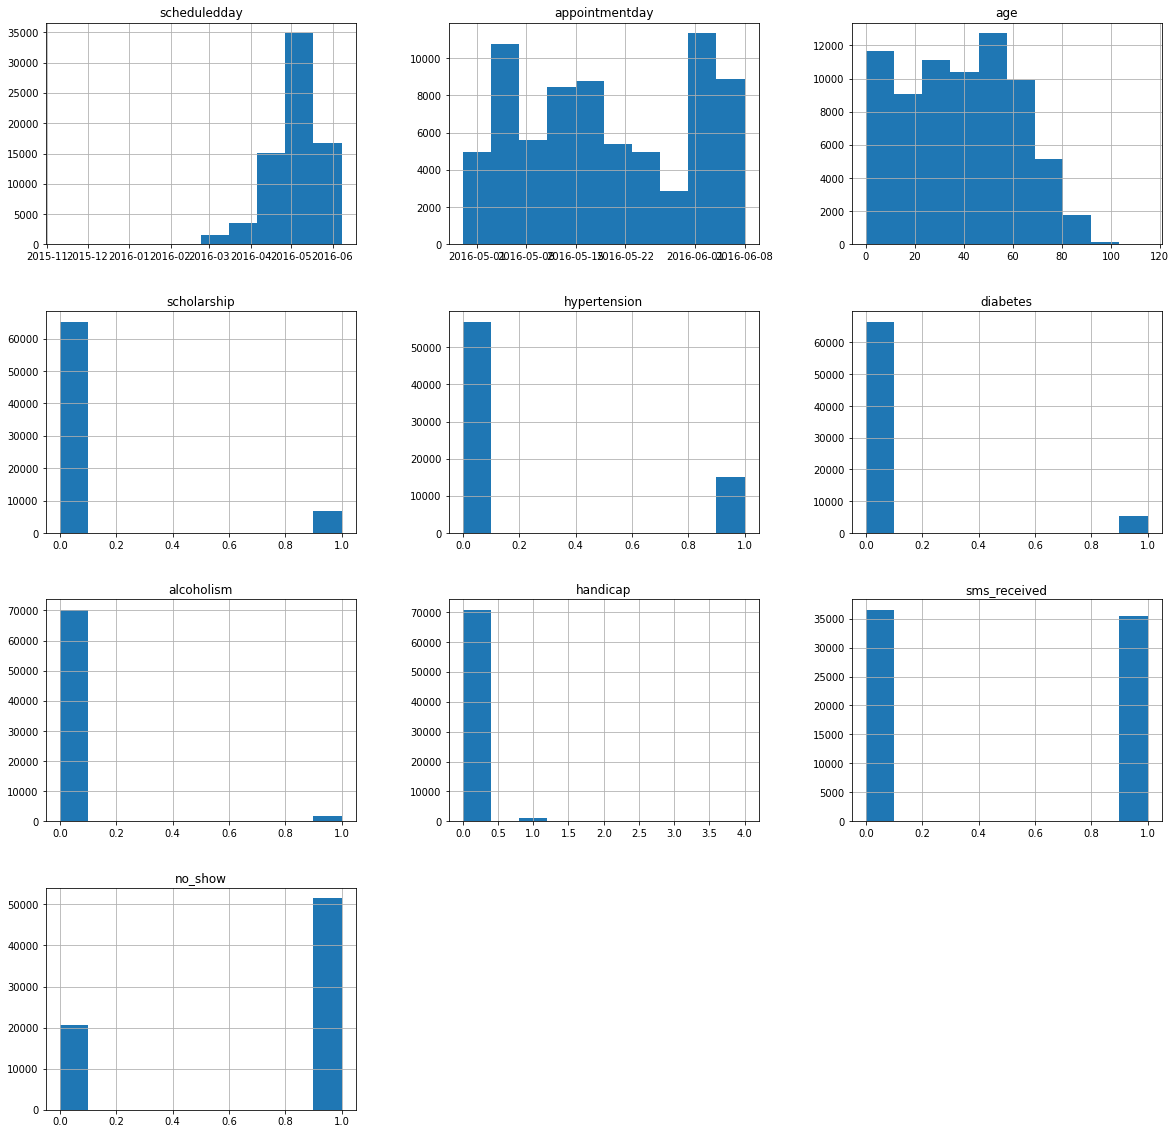

In [290]:
df.hist(figsize=(20,20))

In [291]:
df['waiting_day']= df['appointmentday']-df['scheduledday']
df.describe()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,waiting_day
count,71959.000000,71959.000000,71959.000000,71959.000000,71959.000000,71959.000000,71959.000000,71959.000000,71959
mean,38.502564,0.092706,0.208897,0.074723,0.025320,0.020025,0.493086,0.714810,15 days 03:50:06.596145027
std,22.925421,0.290021,0.406523,0.262946,0.157096,0.154072,0.499956,0.451508,16 days 11:46:35.560378677
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0 days 03:16:20
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3 days 15:14:50
50%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,8 days 16:25:29
75%,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,21 days 15:01:04.500000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,178 days 13:19:01


<a id='eda'></a>
## Exploratory Data Analysis

> Now that We've trimmed and cleaned the data, We're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that we posed in the Introduction section. We should compute the relevant statistics throughout the analysis when an inference is made about the data. 


> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 (The percentage  of people that show for the appointment to those that didn't show)

In [292]:
#change the 1 and 0 value to True and False respectively
show_up = df.no_show==True
show_no = df.no_show==False


In [293]:
#get mean of those that showed up
showUp_mean = show_up.mean()
showUp_mean

0.714809822259898

In [294]:
#get mean of those that didnt show up
noShow_up_mean = show_no.mean()
noShow_up_mean

0.285190177740102

([<matplotlib.patches.Wedge at 0x153ba16a0>,
 [Text(-0.6872539291105592, -0.8588841813202166, 'no-show-up'),
  Text(0.8746868188679846, 1.0931253216802754, 'show-up')],
 [Text(-0.37486577951485045, -0.4684822807201181, '28.5%'),
  Text(0.5622986692722758, 0.702723421080177, '71.5%')])

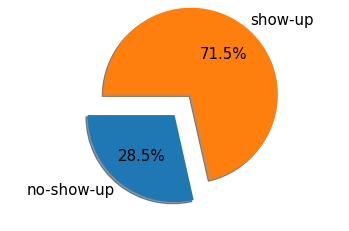

In [295]:
data = [noShow_up_mean, showUp_mean] #means value of those patient that showed up and those that didnt showed up
label= ['no-show-up', 'show-up']
plt.axis('equal')
plt.pie(data, labels=label,shadow=True,startangle=180, textprops ={"fontsize":15},explode=(0,0.3), autopct='%1.1f%%')


><strong>71.5%</strong> of patients that showed up for the appointment
>><strong>28.5%</strong> of patients that didn't  show up for the appointment



### Research Question 2  (Who showed up most for the appointment between male and female)

In [296]:
gender = df.gender.value_counts()
male_prop = gender[1]/gender.sum()
female_prop = gender[0]/gender.sum()


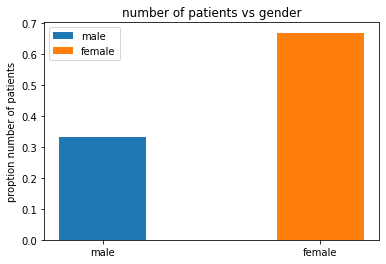

In [297]:
#plotting a bar chart to explore show rate of the genders

plt.bar(0,male_prop,width=0.4, label='male')
plt.bar(1,female_prop ,width=0.4, label='female' )
plt.xticks([0,1],['male','female'])
plt.ylabel('proption number of patients')
plt.title('number of patients vs gender')
plt.legend()

><strong> From the diagram above we could see the percentage of Male to Female patients</strong>

>The percentage of Female is 66.8% of the patients.

>The percentage of Male is 33.2% of the patients.

>Now lets investigate who show up most between both genders

In [298]:
#get a new dataframe containing those who showed up
show_df = df.query('no_show==1')
show_df.describe()



,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,waiting_day
count,51437.000000,51437.000000,51437.000000,51437.000000,51437.000000,51437.000000,51437.000000,51437.0,51437
mean,39.965706,0.084336,0.223497,0.078445,0.023349,0.020724,0.499601,1.0,14 days 12:48:25.176798802
std,23.140047,0.277894,0.416592,0.268874,0.151011,0.155761,0.500005,0.0,16 days 09:37:16.594691165
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0 days 03:16:20
25%,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,3 days 11:19:20
50%,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,7 days 15:54:02
75%,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,20 days 15:28:53
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.0,178 days 13:17:18


In [299]:
#group by gender and get the mean of those that showed up
gender_df = df.groupby('gender').no_show.mean()
df.groupby('gender').no_show.value_counts()




gender  no_show
F       1          34396
        0          13674
M       1          17041
        0           6848
Name: no_show, dtype: int64

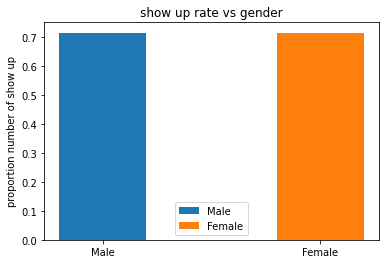

In [300]:
data=[gender_df[0],gender_df[1]] #this is the mean of both male and female that showed up
plt.bar(0,data[1],width=0.4, label='Male')
plt.bar(1,data[0] ,width=0.4, label='Female' )
plt.xticks([0,1],['Male','Female'])
plt.ylabel('proportion number of show up')
plt.title('show up rate vs gender')
plt.legend()

>The difference between the Male and Female show up rate is not that obvious

>We assumed that they have almost equal show rate

array([[<AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='scholarship', ylabel='age'>,
        <AxesSubplot:xlabel='hypertension', ylabel='age'>,
        <AxesSubplot:xlabel='diabetes', ylabel='age'>,
        <AxesSubplot:xlabel='alcoholism', ylabel='age'>,
        <AxesSubplot:xlabel='handicap', ylabel='age'>,
        <AxesSubplot:xlabel='sms_received', ylabel='age'>,
        <AxesSubplot:xlabel='no_show', ylabel='age'>],
       [<AxesSubplot:xlabel='age', ylabel='scholarship'>,
        <AxesSubplot:xlabel='scholarship', ylabel='scholarship'>,
        <AxesSubplot:xlabel='hypertension', ylabel='scholarship'>,
        <AxesSubplot:xlabel='diabetes', ylabel='scholarship'>,
        <AxesSubplot:xlabel='alcoholism', ylabel='scholarship'>,
        <AxesSubplot:xlabel='handicap', ylabel='scholarship'>,
        <AxesSubplot:xlabel='sms_received', ylabel='scholarship'>,
        <AxesSubplot:xlabel='no_show', ylabel='scholarship'>],
       [<AxesSubplot:xlabel='age', ylabe

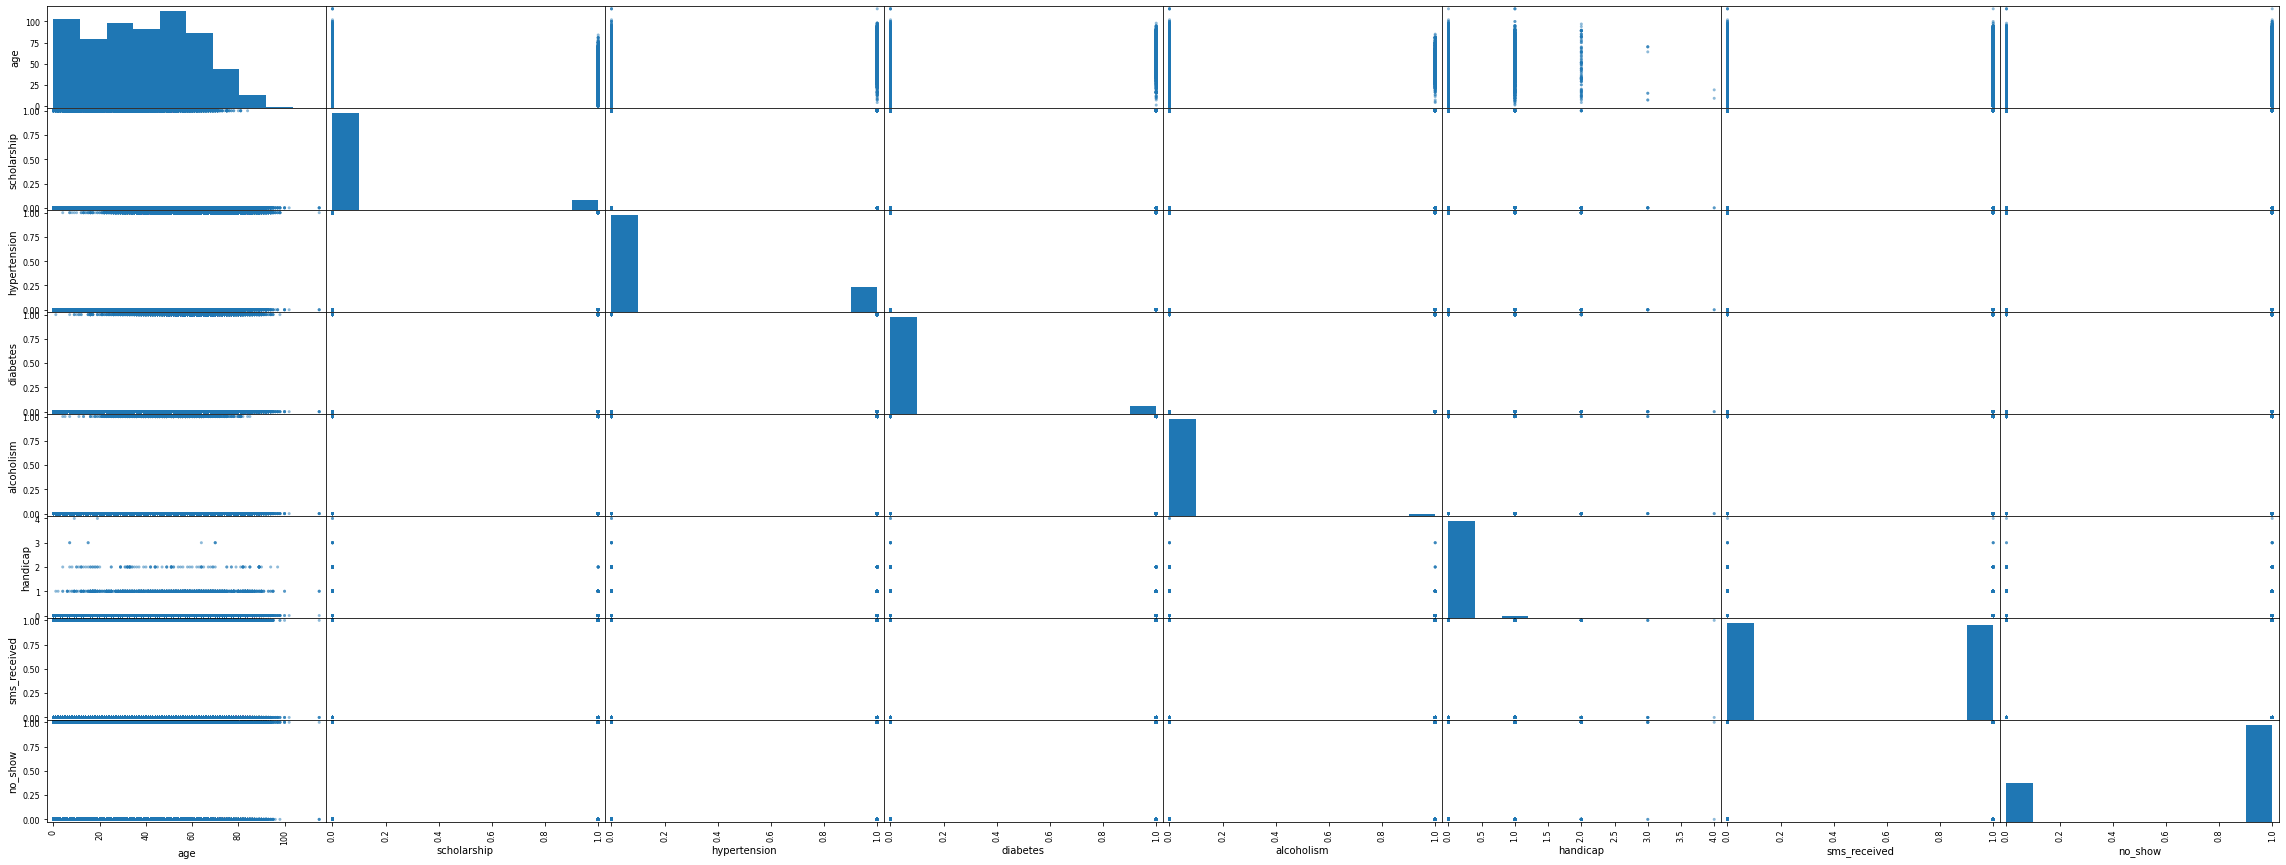

In [301]:
pd.plotting.scatter_matrix(df,figsize=(40,15))

### Research Question 3  (How does waiting days affect show up)

In [302]:
#group data by show up
df.groupby('no_show').waiting_day.describe()


,count,mean,std,min,25%,50%,75%,max
no_show,,,,,,,,
0,20522,16 days 17:30:08.131419939,16 days 14:39:19.813007466,0 days 03:19:13,4 days 13:45:12,12 days 13:22:41.500000,24 days 14:54:57.500000,178 days 13:19:01
1,51437,14 days 12:48:25.176798802,16 days 09:37:16.594691165,0 days 03:16:20,3 days 11:19:20,7 days 15:54:02,20 days 15:28:53,178 days 13:17:18


><strong>From the table above we could see that:</strong>
>1. Those who showed up have an average of 14 days interval from the schedule day to appointment day

>2. The patients that didn't show up for the appointment have an average of 16days interval between the scheduled day and the Appointment day

>Therefore the longer the days between the schedule day and the appointment day the more the patients missed the appointment day (The waiting days is inversely proportional to show up rate)




### Research Question 3  (How does age affect patients appointment )

In [303]:
#get statistics description for ages
df.describe().age

count    71959.000000
mean        38.502564
std         22.925421
min          0.000000
25%         19.000000
50%         39.000000
75%         57.000000
max        115.000000
Name: age, dtype: float64

**From the statistical description i noticed that :**
>1. 50% of the patiennts are of 39 years old

>2. 75% of the patients are of 57 years old

>3. 25% of them are 19 year old 

>4. The average age is 38.5

<AxesSubplot:ylabel='Frequency'>

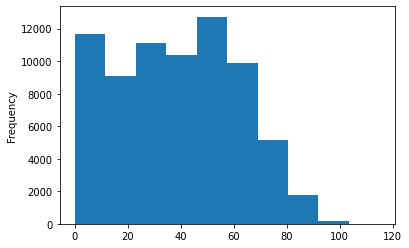

In [304]:
df.age.plot(kind='hist')

### let us now take a look at how the affect the show rate 

> **we will be categorising the age into groups by using**

>1. Minimum age 
>2. Maximum age
>3. 50% of the age 
>4. 75% of the age
>5. 25% of the age 

In [305]:
#here we are going to categorise ages
infant= df.query('age < 2').no_show.mean()
children_13 = df.query('age < 13 and age>2').no_show.mean()
teenage = df.query('age < 18 and age>13').no_show.mean()
youth = df.query('age < 50 and age>18').no_show.mean()
adult = df.query('age < 65 and age>50').no_show.mean()
old =df.query('age <= 115 and age>65').no_show.mean()

 



In [306]:
#age no_show statistics
df.groupby('no_show').age.describe()

,count,mean,std,min,25%,50%,75%,max
no_show,,,,,,,,
0,20522.0,34.835299,21.954582,0.0,17.0,33.0,51.0,115.0
1,51437.0,39.965706,23.140047,0.0,21.0,41.0,58.0,115.0


Text(0.5, 1.0, 'show up rate per Age categories')

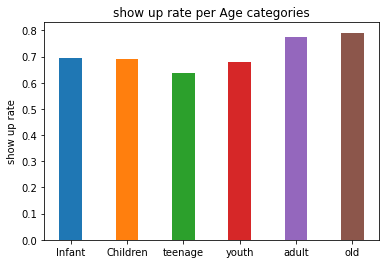

In [307]:
data=[infant,children_13,teenage,youth,adult,old] #this is the mean of age categories that showed up
plt.bar(0,data[0],width=0.4, label='Infant')
plt.bar(1,data[1] ,width=0.4, label='Children' )
plt.bar(2,data[2] ,width=0.4, label='teenage' )
plt.bar(3,data[3] ,width=0.4, label='youth' )
plt.bar(4,data[4] ,width=0.4, label='adult' )
plt.bar(5,data[5] ,width=0.4, label='old' )
plt.xticks([0,1,2,3,4,5],['Infant','Children','teenage','youth','adult','old'])
plt.ylabel('show up rate')
plt.title('show up rate per Age categories')
#plt.legend()

### let me confirm my analysis by performing another age group analysis 

#### now let us get the mean of age categories with respect to no_show columns  using panda groupby function


In [308]:
#check statistics info with show rate
df.groupby('no_show').age.describe()

,count,mean,std,min,25%,50%,75%,max
no_show,,,,,,,,
0,20522.0,34.835299,21.954582,0.0,17.0,33.0,51.0,115.0
1,51437.0,39.965706,23.140047,0.0,21.0,41.0,58.0,115.0


In [309]:
#view the min ,25%,50%,75%,max  age
bin_ages= [0,15,18,41,58,115]

In [310]:
#create label for age category
bin_labels =['children','teen','youth','adult','old']

#### Here i will be categorising ages below 20 as teen

In [311]:
#age category column
df['age_category']= pd.cut(df['age'],bin_ages,labels=bin_labels)
df.head(100)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,waiting_day,age_category
5,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76.0,REPÚBLICA,0,1,0,0,0,0,1,1 days 15:23:09,old
6,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23.0,GOIABEIRAS,0,0,0,0,0,0,0,1 days 08:54:48,youth
7,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39.0,GOIABEIRAS,0,0,0,0,0,0,0,1 days 08:20:02,youth
9,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19.0,CONQUISTA,0,0,0,0,0,0,1,1 days 11:11:35,youth
10,F,2016-04-27 14:58:11+00:00,2016-04-29 00:00:00+00:00,30.0,NOVA PALESTINA,0,0,0,0,0,0,1,1 days 09:01:49,youth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,M,2016-04-15 07:56:48+00:00,2016-04-29 00:00:00+00:00,36.0,DA PENHA,0,0,0,0,0,1,1,13 days 16:03:12,youth
152,F,2016-04-27 13:46:37+00:00,2016-04-29 00:00:00+00:00,18.0,ITARARÉ,0,0,0,0,0,0,0,1 days 10:13:23,teen
153,F,2016-04-28 16:38:34+00:00,2016-04-29 00:00:00+00:00,30.0,ITARARÉ,0,0,0,0,0,0,1,0 days 07:21:26,youth
154,F,2016-04-28 16:38:34+00:00,2016-04-29 00:00:00+00:00,30.0,ITARARÉ,0,0,0,0,0,0,1,0 days 07:21:26,youth


In [312]:
category_mean = df.groupby('age_category').no_show.mean()
category_mean

age_category
children    0.674146
teen        0.638633
youth       0.666234
adult       0.742537
old         0.792870
Name: no_show, dtype: float64

### Observations  from the category mean 
> 1. The old patients have highest show up rate
>2. The teens have the lowwest show rate 


Text(0.5, 1.0, 'show up rate per Age categories')

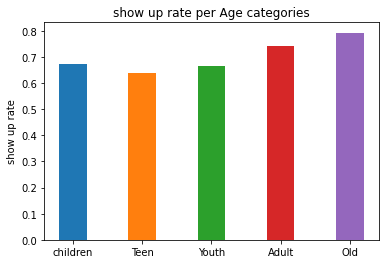

In [313]:
#lets represent it with a bar chart
data=[category_mean[0],category_mean[1],category_mean[2],category_mean[3],category_mean[4]] #this is the mean of age categories that showed up

plt.bar(0,data[0],width=0.4, label='Children')
plt.bar(1,data[1],width=0.4, label='Teen')
plt.bar(2,data[2],width=0.4, label='Youth')
plt.bar(3,data[3],width=0.4, label='Adult')
plt.bar(4,data[4],width=0.4, label='Old')
plt.xticks([0,1,2,3,4],['children','Teen','Youth','Adult','Old'])
plt.ylabel('show up rate')
plt.title('show up rate per Age categories')
#plt.legend()




<AxesSubplot:>

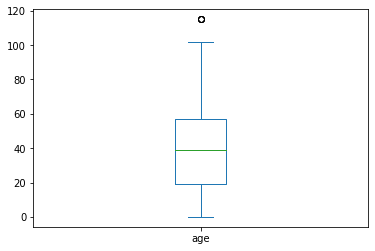

In [314]:
df.plot(kind="box", y="age",x="no_show")

####  Observation : This diagram clearly shows that old patients have the highest show up rate 
####  followed by , the adults and the children 
#### I strongly believe that age has an effect on the show up rate

### Research Question 4  (How does the Sms affect the show up  )

In [315]:
#group patient by sms_recived column with respect to no_show column
sms_mean = df.groupby('sms_received').no_show.mean()
sms_mean


sms_received
0    0.705623
1    0.724255
Name: no_show, dtype: float64

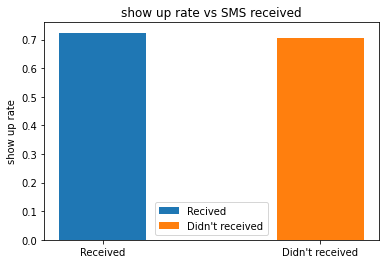

In [316]:
data=[sms_mean[0],sms_mean[1]] #this is the mean of both male and female that showed up respctively
plt.bar(0,data[1],width=0.4, label='Recived')
plt.bar(1,data[0] ,width=0.4, label='Didn\'t received' )
plt.xticks([0,1],['Received','Didn\'t received'])
plt.ylabel('show up rate')
plt.title('show up rate vs SMS received')
plt.legend()

>People who received sms are more likely to show up because they have show rate of 72% 

>People who didn't received sms have show rate of 70%

> lets check the distribution relationship between show up rate and sms 


<AxesSubplot:>

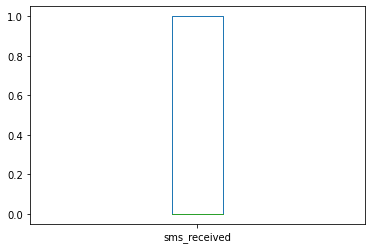

In [317]:
df.plot(kind="box", x='no_show',y='sms_received')

**there is no strong or positive relationship between show rate and sms received no**

### Research Question 5  (Does the Scholarship affect the patients appointment )

In [318]:
#lets take a look on the scholarship statistics
df.describe().scholarship

count    71959.000000
mean         0.092706
std          0.290021
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: scholarship, dtype: float64

In [319]:
#change the 1 and 0 value to True and False respectively
scholar = df.scholarship==1
non_scholar = df.scholarship==0



In [320]:
#get the mean of those with scholarship
scholar_mean = scholar.mean()
scholar_mean

0.09270556844869995

In [321]:
#get the mean of those that are not scholars
non_scholar_mean = non_scholar.mean()
non_scholar_mean


0.9072944315513001

([<matplotlib.patches.Wedge at 0x159c5a340>,
 [Text(-1.0536764227531303, -0.3158575567153122, 'scholarship'),
  Text(1.341042691639113, 0.4020006208966883, 'no scholarship')],
 [Text(-0.5747325942289802, -0.17228594002653388, '9.3%'),
  Text(0.8620988731965726, 0.2584289705764425, '90.7%')])

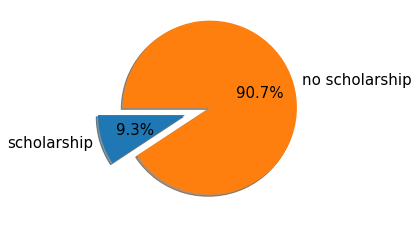

In [322]:
data = [scholar_mean, non_scholar_mean] #means value of those patient with scholarship and those with no scholarship
label= ['scholarship', 'no scholarship']
plt.axis('equal')
plt.pie(data, labels=label,shadow=True,startangle=180, textprops ={"fontsize":15},explode=(0,0.3), autopct='%1.1f%%')



### Obeservation:
>1. 90.7% of the patients are not on scholarship
>2. 9.3% of the patients are on scholarship

#### Therefore most of patients are not on scholarship

### i wil be checking how the scholarhip affect the appointment  show up

In [323]:
#get the statistics of patient with scholarship and non with respect to show up
sch_showup = df.groupby('scholarship').no_show.describe()
sch_showup

,count,mean,std,min,25%,50%,75%,max
scholarship,,,,,,,,
0,65288.0,0.721404,0.448312,0.0,0.0,1.0,1.0,1.0
1,6671.0,0.650277,0.476918,0.0,0.0,1.0,1.0,1.0


In [324]:
#get the mean of patient with scholarship that show up  for the appointment
sch_mean_showup = df.groupby('scholarship').no_show.mean()
sch_mean_showup

scholarship
0    0.721404
1    0.650277
Name: no_show, dtype: float64

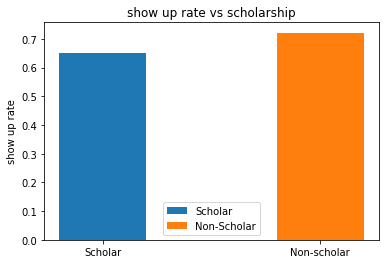

In [325]:
#represent on bar chart
data=[sch_mean_showup[0],sch_mean_showup[1]] #this is the mean of both scholars  and non_scholars  that showed up
plt.bar(0,data[1],width=0.4, label='Scholar')
plt.bar(1,data[0] ,width=0.4, label='Non-Scholar' )
plt.xticks([0,1],['Scholar','Non-scholar'])
plt.ylabel('show up rate')
plt.title('show up rate vs scholarship')
plt.legend()


### Observation :
> The scholars has 0.72 average show up
> The non-scholars have o.65 average show 
From this result i can say that non-scholar patients show up for the appointment than the scholars

>Lets check the corelation between the no_show column and the scholarship columns 

<AxesSubplot:xlabel='scholarship', ylabel='no_show'>

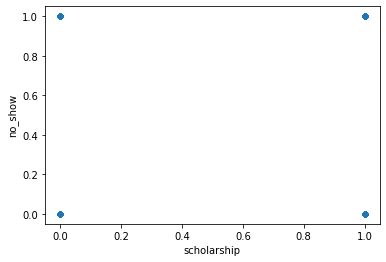

In [326]:
df.plot(kind="scatter", y="no_show",x="scholarship")

### observation:
 >There is no correclation between the scholarship and the no_show columns 
 
 >Therefore scholarship can not have an effect on show up rate 

### Research Question 6  (How does the diseases  affect the show up rate )

### here we will be exploring the following
> 1. The percentage of patients with hypertension and non hypertensive 
> 2. The show up rate of hypertensive patients and non hypertensive
> 3. The percentage of patients with diabetes and non diabetes
> 4. The show up rate of diabetes patients and non diabetes

In [327]:
#lets take a look on the scholarship statistics
df.describe().hypertension

count    71959.000000
mean         0.208897
std          0.406523
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: hypertension, dtype: float64

In [328]:
#change the 1 and 0 value to True and False respectively
hyper = df.hypertension==True
no_hyper = df.hypertension==False



In [329]:
#get the mean of those with hypertension
hyper_mean = hyper.mean()
hyper_mean

0.20889673286176852

In [330]:
#get the mean of those with no hypertension
no_hyper_mean = no_hyper.mean()
no_hyper_mean

0.7911032671382315

([<matplotlib.patches.Wedge at 0x15a77e8b0>,
 [Text(-0.8715020820170184, -0.6711811387695592, 'Hypertension'),
  Text(1.1091845480004907, 0.8542304364028173, 'Non-Hypertensive')],
 [Text(-0.47536477200928273, -0.3660988029652141, '20.9%'),
  Text(0.7130472094288867, 0.5491481376875254, '79.1%')])

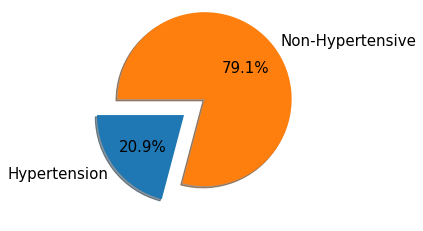

In [331]:
data = [hyper_mean, no_hyper_mean] #means value of those patient that are hypertensive and those that are not
label= ['Hypertension', 'Non-Hypertensive']
plt.axis('equal')
plt.pie(data, labels=label,shadow=True,startangle=180, textprops ={"fontsize":15},explode=(0,0.3), autopct='%1.1f%%')



### Obeservation:
>1. 79.1% of the patients are not Hypertensive
>2. 20.9% of the patients are Hypertensive

#### Therefore most of patients are not hypertensive

### i wil be checking how hypertension affect patients appointment 

In [332]:
#get statistcs of patients with hypertension and non with respect to no_show column
hyp_showup = df.groupby('hypertension').no_show.describe()
hyp_showup

,count,mean,std,min,25%,50%,75%,max
hypertension,,,,,,,,
0,56927.0,0.701618,0.457552,0.0,0.0,1.0,1.0,1.0
1,15032.0,0.764768,0.424158,0.0,1.0,1.0,1.0,1.0


In [333]:
#get mean statistics of patients with hypertension and non with respect to no_show column

hyp_mean_showup = df.groupby('hypertension').no_show.mean()
hyp_mean_showup

hypertension
0    0.701618
1    0.764768
Name: no_show, dtype: float64

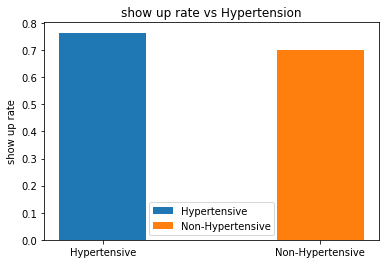

In [334]:
#represent on bar chart
data=[hyp_mean_showup[0],hyp_mean_showup[1]] #this is the mean of both Hypertensive  and Non Hypertensive patients that showed up
plt.bar(0,data[1],width=0.4, label='Hypertensive')
plt.bar(1,data[0] ,width=0.4, label='Non-Hypertensive' )
plt.xticks([0,1],['Hypertensive','Non-Hypertensive'])
plt.ylabel('show up rate')
plt.title('show up rate vs Hypertension')
plt.legend()



### Observation :
> The Hypertensive Patients have 0.76 average show up
> The Non-Hypertensive have o.70 average show up
From this result i can say that Hypertensive patients show up for the appointment than the Non-hypertensive

>Lets check the corelation between the no_show column and the Hypertension columns 

<AxesSubplot:>

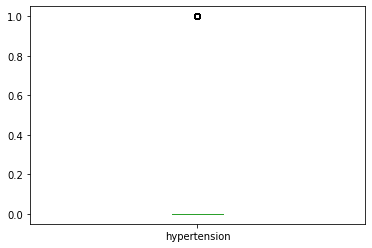

In [335]:
df.plot(kind="box", x="no_show",y="hypertension")

In [336]:
#lets take a look on the Diabetes statistics
df.describe().diabetes

count    71959.000000
mean         0.074723
std          0.262946
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: diabetes, dtype: float64

In [337]:
#change the 1 and 0 value to True and False respectively
diab = df.diabetes==1
non_diab = df.diabetes==0



In [338]:
#get the mean of those with Diabetes
diab_mean = diab.mean()
diab_mean

0.07472310621326032

In [339]:
#get the mean of those with No Diabetes
no_diab_mean = non_diab.mean()
no_diab_mean

0.9252768937867397

([<matplotlib.patches.Wedge at 0x1538c9280>,
 [Text(-1.0698298833174351, -0.25585937692608257, 'diabetes'),
  Text(1.3616016849210055, 0.32563914325565746, 'Non-Diabetes')],
 [Text(-0.5835435727186009, -0.13955966014149956, '7.5%'),
  Text(0.8753153688777893, 0.20933944923577974, '92.5%')])

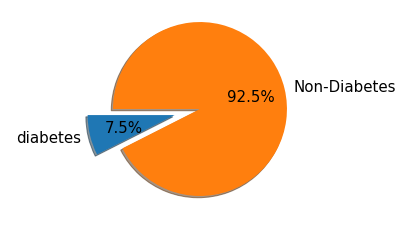

In [340]:
data = [diab_mean, no_diab_mean] #means value of those patient with Diabetes  and those that are not Diabetic 
label= ['diabetes', 'Non-Diabetes']
plt.axis('equal')
plt.pie(data, labels=label,shadow=True,startangle=180, textprops ={"fontsize":15},explode=(0,0.3), autopct='%1.1f%%')



### Obeservation:
>1. 92.8% of the patients are Non-Diabetes
>2. 20.9% of the patients are Diabetes

#### Therefore most of patients are not Diabetics

### i wil be checking how Diabetes affect patients appointment 

In [341]:
#get statistcs of patients with Diabetes and No Diabetes with respect to no_show column
diab_showup = df.groupby('diabetes').no_show.describe()
diab_showup

,count,mean,std,min,25%,50%,75%,max
diabetes,,,,,,,,
0,66582.0,0.711934,0.452865,0.0,0.0,1.0,1.0,1.0
1,5377.0,0.750418,0.432811,0.0,1.0,1.0,1.0,1.0


In [342]:

diab_mean_showup = df.groupby('diabetes').no_show.mean()
diab_mean_showup

diabetes
0    0.711934
1    0.750418
Name: no_show, dtype: float64

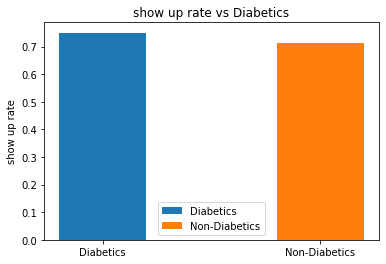

In [343]:
#represent on bar chart
data=[diab_mean_showup[0],diab_mean_showup[1]] #this is the mean of both Diabetic patient  and Non Diabetic patients  that showed up
plt.bar(0,data[1],width=0.4, label='Diabetics')
plt.bar(1,data[0] ,width=0.4, label='Non-Diabetics' )
plt.xticks([0,1],['Diabetics','Non-Diabetics'])
plt.ylabel('show up rate')
plt.title('show up rate vs Diabetics')
plt.legend()




### Observation :
> The Diabetic Patients have 0.75 average show up
> The Non-Diabetics Patients have 0.71 average show up
From this result i can say that Diabetic patients show up for the appointment than the Non-Diabetics Patients

>The difference between them is not that large so i can not say that Diabetic affect the show up rate

<a id='conclusions'></a>
## Conclusions



## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [344]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

Traceback (most recent call last):
  File "/Users/user/opt/miniconda3/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/Users/user/opt/miniconda3/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/Users/user/opt/miniconda3/lib/python3.9/site-packages/nbconvert/__main__.py", line 3, in <module>
    main()
  File "/Users/user/opt/miniconda3/lib/python3.9/site-packages/jupyter_core/application.py", line 269, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
  File "/Users/user/opt/miniconda3/lib/python3.9/site-packages/traitlets/config/application.py", line 846, in launch_instance
    app.start()
  File "/Users/user/opt/miniconda3/lib/python3.9/site-packages/nbconvert/nbconvertapp.py", line 414, in start
    self.convert_notebooks()
  File "/Users/user/opt/miniconda3/lib/python3.9/site-packages/nbconvert/nbconvertapp.py", line 576, in convert_notebooks
    raise ValueE

1